# Newton Rapson Method. 

### numerical methods in python  and numerical python.

$$ 
x_{i} = x_{1-i} - \frac{g(x_{i-1})}{g'(x_{i-1})}
$$

In [1]:
import numpy as np 

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


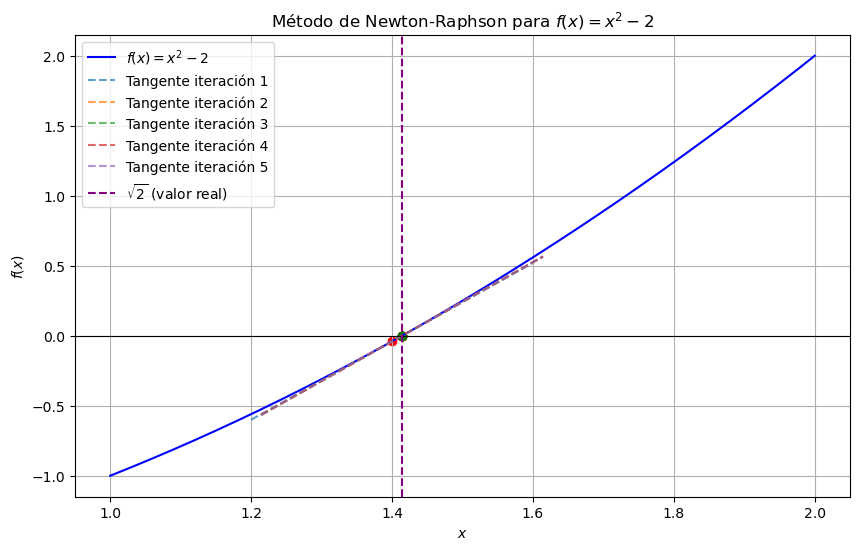

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función y su derivada
def f(x):
    return x**2 - 2

def f_prime(x):
    return 2*x

# Método de Newton-Raphson
def newton_raphson(x0, f, f_prime, iterations=5):
    approximations = [x0]
    for _ in range(iterations):
        x0 = x0 - f(x0) / f_prime(x0)
        approximations.append(x0)
    return approximations

# Puntos iniciales y aproximaciones
x0 = 1.4
approximations = newton_raphson(x0, f, f_prime)

# Rango de valores para graficar la función
x = np.linspace(1, 2, 500)
y = f(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = x^2 - 2$', color='blue')

# Graficar aproximaciones de Newton-Raphson
for i, x_val in enumerate(approximations[:-1]):
    tangent_x = np.linspace(x_val - 0.2, x_val + 0.2, 50)
    tangent_y = f(x_val) + f_prime(x_val) * (tangent_x - x_val)
    plt.plot(tangent_x, tangent_y, '--', label=f'Tangente iteración {i+1}', alpha=0.7)
    plt.scatter(x_val, f(x_val), color='red')  # Punto actual
    plt.scatter(approximations[i+1], 0, color='green')  # Siguiente aproximación

# Configurar la gráfica
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(np.sqrt(2), color='purple', linestyle='--', label='$\sqrt{2}$ (valor real)')
plt.title('Método de Newton-Raphson para $f(x) = x^2 - 2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()


In [3]:
x0 = 1.41

N_rap = x0 - ((x0**2 - 2)/2*x0)

print("newton_raphson =", N_rap)
print("python sqr =", np.sqrt(2))

newton_raphson = 1.4183895000000002
python sqr = 1.4142135623730951


##### Cubic function

In [4]:
x0 = -1.2941176470588234


g = lambda x: x**3 + 3*(x**2) - 2*x - 5
g_p = lambda x: 3*(x**2) + 6*x - 2

NM_solution = x0 - g(x0)/g_p(x0)

print("Newton-Raphson solution =", NM_solution)

Newton-Raphson solution = -1.2002146844139117


In [5]:
round(g(-3.1284190638445777), 10)

-0.0

In [6]:
# Scipy solution 

from scipy.optimize import fsolve

fsolve(g, [2, -2, -3])

array([ 1.33005874, -1.20163968, -3.12841906])

### Multivariate optimization without constraints, Hessian and Newton-Raphson

##### Multivariate formula to optimize 

$$
x_{k+1} = x_k - H_f^{-1}  (x_f) \bigtriangledown (x_k)
$$

$$H_f^{-1} : Hessian\  Inverse$$

$$(x_f) \bigtriangledown (x_k) : Gradient$$

In [7]:
import sympy as sy 

x1, x2 = sy.symbols('x1, x2')

f_sym = (x1 -1)**4 + 5*(x2 -1)**2 - 2*x1*x2

f_diff = [f_sym.diff(x_) for x_ in (x1, x2)]

In [8]:
 # Gradient

sy.Matrix(f_diff)

Matrix([
[-2*x2 + 4*(x1 - 1)**3],
[   -2*x1 + 10*x2 - 10]])

In [9]:
# Hessian matrix

Hessian = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

sy.Matrix(Hessian)

Matrix([
[12*(x1 - 1)**2, -2],
[            -2, 10]])

In [10]:
# convert the functiosns 

f_lambda = sy.lambdify((x1, x2), f_sym, 'numpy')

fprime_lambda = sy.lambdify((x1, x2), f_diff, 'numpy')

f_hessian = sy.lambdify((x1, x2), Hessian, 'numpy')

In [11]:
def func_XY_to_X_Y(f):
    """ Wrapper for f(X) -> f(X[0], f(X[1]))"""
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_to_X_Y(f_lambda)
fprime = func_XY_to_X_Y(fprime_lambda)
f_hess = func_XY_to_X_Y(f_hessian)

In [12]:
from scipy import optimize as opt 

x_opt = opt.fmin_ncg(f, (0, 0), fprime=fprime, fhess=f_hess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [13]:
print(x_opt)

[1.88292613 1.37658523]


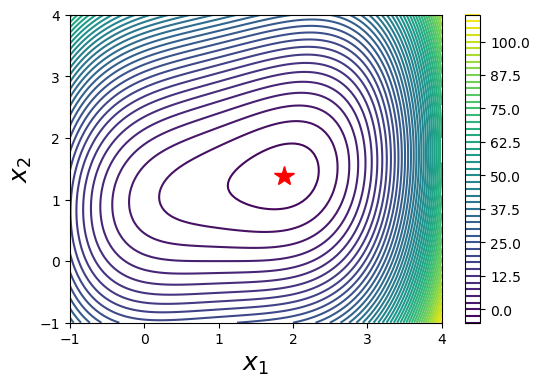

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

x_ = y_ = np.linspace(-1,4,100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lambda(X,Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In practice, it may not always be possible to provide functions for evaluating both 
the gradient and the Hessian of the objective function, and often it is convenient with a 
solver that only requires function evaluations. For such cases, several methods exist to 
numerically estimate the gradient or the Hessian or both. Methods that approximate the 
Hessian are known as quasi-Newton methods. (Johanson Robert, 2019)

Two popular methods are the 
Broyden-Fletcher-Goldfarb-Shanno (BFGS) and the conjugate gradient methods, which 
are implemented in SciPy as the functions optimize.fmin_bfgs and optimize.fmin_cg. (Johanson Robert, 2019)
 

In [15]:
x_opt2 = opt.fmin_bfgs(f,(0,0), fprime=fprime, disp=True, full_output=True)

print(x_opt2)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13
(array([1.88292645, 1.37658596]), -3.8672228877100556, array([1.54530413e-06, 6.74316897e-06]), array([[0.11091695, 0.02064699],
       [0.02064699, 0.10048655]]), 13, 13, 0)


In [16]:
x_opt3 = opt.fmin_cg(f,(0,0), fprime=fprime, disp=True, full_output=True)

print(x_opt3)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18
(array([1.88292612, 1.37658523]), -3.8672228877127965, 18, 18, 0)


#### optimize by brute force 

In [17]:
def f(X): 
    x, y = X
    return (4*np.sin(np.pi * x) + 6*np.sin(np.pi * y)) + (x-1)**2 + (y-1)**2


In [18]:
x_start = opt.brute(f,(slice(-3, 5, 0.5), slice(-3,5,0.5)), finish=None)

x_start

array([1.5, 1.5])

In [19]:
f(x_start)

-9.5

In [20]:
x_opt = opt.fmin_bfgs(f, x_start, disp=True)
print(x_opt)
print(f(x_opt))

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7
[1.47586906 1.48365787]
-9.520229273055016


In [21]:
def func_XY_to_XY(f, X, Y):
    """
    Wrapper for f(X,Y) -> f([X, Y])

    """
    s = np.shape(X)
    return  f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

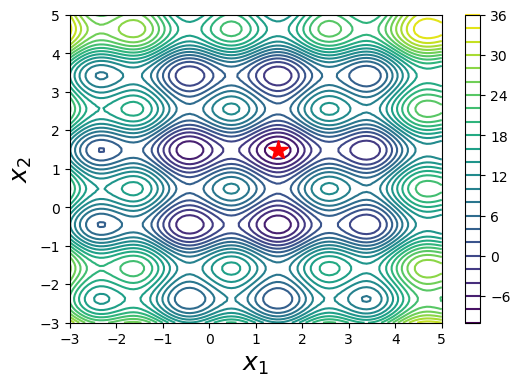

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_XY_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

##### Non linear least square problems 
##### Lengbert Maquard Solution

$$
(J^T J) \delta = J^T[y-f(B)]    
$$

$$
[J^T J + \lambda diag(J^T J)] \delta =J^T[y-f(B)]
$$

$$
\delta = [J^T J + \lambda diag(J^T J)]^{-1} J^T[y-f(B)]
$$

where 

$$
\delta = \bigtriangleup B
$$

$$
residuals =  [y-f(B)]
$$

In [23]:
import numpy as np

# Datos
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
y_observado = np.array([1.0, 0.818, 0.670, 0.548, 0.447])

# Modelo: y = beta1 * exp(beta2 * x)
def modelo(beta, x):
    return beta[0] * np.exp(beta[1] * x)

# Residuos: r = y_observado - y_modelo
def residuos(beta, x, y_observado):
    return y_observado - modelo(beta, x)

# Jacobiana
def jacobiana(beta, x):
    J = np.zeros((len(x), len(beta)))
    J[:, 0] = -np.exp(beta[1] * x)  # Derivada con respecto a beta1
    J[:, 1] = -beta[0] * x * np.exp(beta[1] * x)  # Derivada con respecto a beta2
    return J

# Parámetros iniciales
beta = np.array([1.5, -1.0])
lambda_ = 0.01  # Parámetro de regularización

# Iteración de Levenberg–Marquardt
for iteracion in range(5):  # Realizamos 5 iteraciones
    r = residuos(beta, x, y_observado)  # Residuos
    J = jacobiana(beta, x)  # Jacobiana
    JTJ = J.T @ J  # J^T * J
    JT_r = J.T @ r  # J^T * r

    # Actualización de los parámetros
    delta_beta = np.linalg.inv(JTJ + lambda_ * np.eye(len(beta))) @ JT_r
    beta = beta + delta_beta

    # Imprimir resultados intermedios
    print(f"Iteración {iteracion + 1}:")
    print(f"  Parámetros: {beta}")
    print(f"  Residuos: {np.linalg.norm(r)}")

# Parámetros finales
print("\nParámetros finales:")
print(beta)


Iteración 1:
  Parámetros: [ 1.99619174 -0.99255026]
  Residuos: 0.8111697627066669
Iteración 2:
  Parámetros: [ 2.98494019 -0.9797152 ]
  Residuos: 1.6207987842554086
Iteración 3:
  Parámetros: [ 4.9551718  -0.96215105]
  Residuos: 3.240777766187164
Iteración 4:
  Parámetros: [ 8.88120874 -0.94246102]
  Residuos: 6.483991487005942
Iteración 5:
  Parámetros: [16.70467032 -0.92312238]
  Residuos: 12.976868958240711

Parámetros finales:
[16.70467032 -0.92312238]


$$
f(x, B) = B_0 + B_1 e^{-B_2 X^2} + r
$$

In [24]:
beta = [0.25, 0.75, 0.5]

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2) 

### x data 
xdata =np.linspace(0,5, 50)

y=f(xdata, *beta)

ydata = y + 0.05* np.random.randn(len(xdata))

In [25]:
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
beta_opt

array([0.27069737, 0.7328778 , 0.52030604])

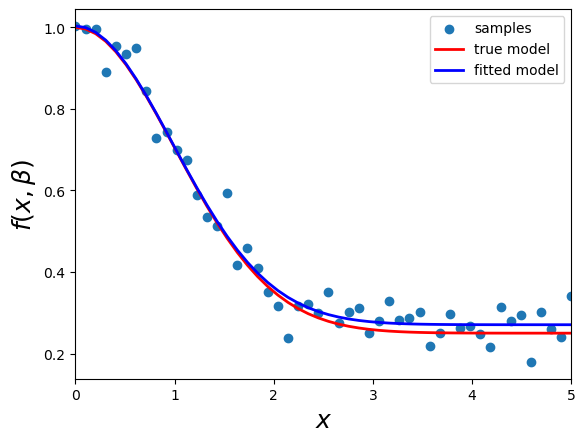

In [26]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [28]:
beta_opt, beta_cov = opt.curve_fit(f, xdata, ydata)
beta_opt

array([0.27069737, 0.7328778 , 0.52030604])